### Abrir archivo features


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('./datasets/train_r21d_all_mean.csv')       # data training con el target
X_train = df.iloc[:,2:514]
Y_train = df.iloc[:, 514]
print(X_train)
print(Y_train)

             0         1         2         3         4         5         6  \
0     1.429103  0.314396  0.595923  1.190022  1.524434  0.506079  0.901132   
1     0.878798  2.127954  1.607034  0.664306  0.522798  1.013348  0.496048   
2     0.859695  0.256636  0.828024  0.762338  0.904630  0.388093  1.098017   
3     0.752613  0.471802  1.577831  0.240010  0.435650  2.282066  0.303541   
4     0.144510  0.798103  0.516781  0.447890  0.350492  0.269545  1.514265   
...        ...       ...       ...       ...       ...       ...       ...   
2807  0.338428  0.666294  0.840163  1.049168  1.257977  0.215807  0.964922   
2808  0.538954  0.400101  0.799760  3.048466  1.371942  0.447107  0.524258   
2809  0.385972  0.340582  0.814018  0.360689  0.486224  0.523912  0.417216   
2810  1.735160  0.462548  0.788947  0.693198  0.457151  0.861305  1.159063   
2811  1.506816  0.152348  0.833440  0.332642  2.210809  0.762035  3.225595   

             7         8         9  ...       502       503    

### Reducción de dimensionalidad

In [68]:
def graph_components(num_components, method, varianza_explicada):
    plt.figure(figsize=(10, 6))
    plt.bar(num_components, varianza_explicada, alpha=0.5, align='center', label='Varianza individual explicada')
    plt.step(num_components, np.cumsum(varianza_explicada), where='mid', label='Varianza acumulada')
    plt.ylabel('Porcentaje de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.title('Scree Plot de ' + method)
    plt.legend(loc='best')
    plt.axhline(y=95, color='r', linestyle='--')  # Línea opcional para el umbral de varianza deseado, ej. 95%
    plt.show()

#### PCA

data scaled
[[ 1.21833241 -0.84788931 -0.26950965 ... -0.5984983  -0.52780081
   0.41526429]
 [ 0.16926448  2.39251878  1.78076581 ... -0.03262437 -0.89664131
  -0.61080475]
 [ 0.13284762 -0.95109407  0.20113345 ... -0.41476565  2.45473342
   0.49524732]
 ...
 [-0.77022732 -0.80110158  0.17273179 ... -0.79877121 -0.16780713
  -1.18550852]
 [ 1.80177964 -0.58317585  0.12189429 ... -0.0784759   0.76385482
  -0.16967129]
 [ 1.366479   -1.13743286  0.21211517 ...  3.10333148 -0.60365109
  -0.84364364]]
max 10.55197714974309
min -2.029990705482973


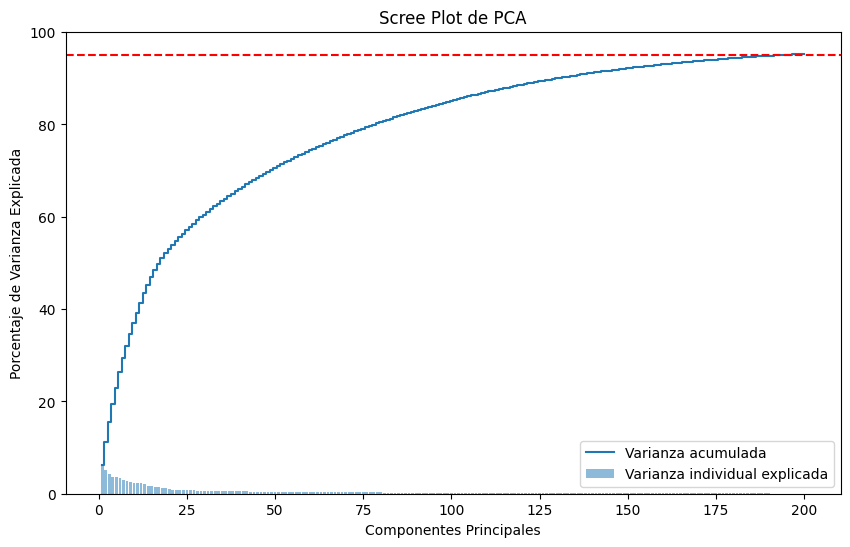

In [73]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train)

print("data scaled")
print(data_scaled)
print("max", np.max(data_scaled))
print("min", np.min(data_scaled))

X_train_scaled = data_scaled

# Define the parameter grid

# Ajustar el PCA
pca = PCA(n_components=200)
pca.fit(X_train_scaled)


# Porcentaje de varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100

# Número de componentes
num_componentes = np.arange(len(varianza_explicada)) + 1

#print(varianza_explicada)
#print(num_components)
#print(pca.explained_variance_ratio_.sum())
#print(pca.singular_values_)

graph_components(num_componentes, "PCA", varianza_explicada)

In [74]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 131


#### Truncated SVD

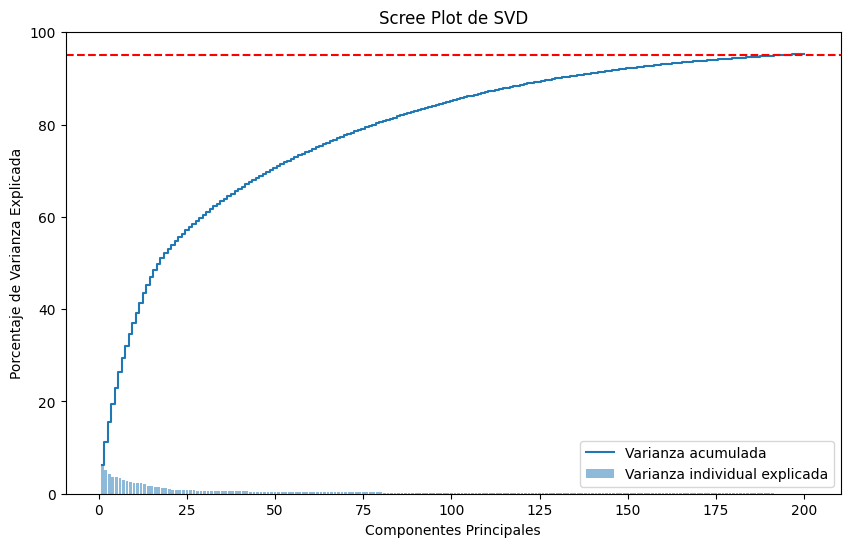

In [75]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

svd = TruncatedSVD(n_components=200, n_iter=5, random_state=42) #cambiar numero de componentes
svd.fit(X_train_scaled)

# Porcentaje de varianza explicada por cada componente
varianza_explicada = svd.explained_variance_ratio_ * 100

# Número de componentes
num_components = np.arange(len(varianza_explicada)) + 1

#print(varianza_explicada)
#print(num_components)
#print(svd.explained_variance_ratio_.sum())
#print(svd.singular_values_)

graph_components(num_components, "SVD", varianza_explicada)

In [76]:
cumulative_explained_variance = np.cumsum(svd.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 131


### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
X_lda = clf.fit_transform(X, y)
LinearDiscriminantAnalysis()
print(clf.predict([[-0.8, -1]]))

### Gaussian Random projection


In [42]:
from sklearn import random_projection
gauss_rand = random_projection.GaussianRandomProjection(eps=.8)
X_gaussian = gauss_rand.fit_transform(X)
X_gaussian.shape

(2812, 212)

In [44]:
graph_components(n_components_range,X_gaussian)

AttributeError: 'numpy.ndarray' object has no attribute 'set_params'

### Factor Analysis

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)
X_fa = transformer.fit_transform(X)
X_fa.shape

### Accuracy testing
Probando clustering con libreria solo para ver accuracy

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder

#transform labels from text to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply K-means clustering
n_clusters = len(np.unique(y_encoded))  # Set number of clusters to number of unique labels
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca) #CAMBIAR ESTO POR EL X REDUCIDO QUE QUEREMOS PROBAR

# Map cluster labels to true labels
def map_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(n_clusters):
        mask = (y_pred == i)
        if np.sum(mask) > 0:
            labels[mask] = mode(y_true[mask])[0]
    return labels

# Map predicted labels to true labels
y_kmeans_mapped = map_labels(y_encoded, y_kmeans)

# Calculate accuracy
accuracy = accuracy_score(y_encoded, y_kmeans_mapped)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.10
